In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as spy

In [2]:
n = 10 # swarm size
gens = 50
w = 0.1
cog_coeff = 0.1
social_coeff = 0.1

def rastringen(x,y):
    d = 2
    return (10*d) +  ((x **2) - 10 * np.cos(2*np.pi*x)) + ((y ** 2) - 10 * np.cos(2*np.pi*y))

min_ = -5.12
max_ = 5.12

## Question 2 Part a

found optimum: (X, Y, rastringen_value):  (0.9872897617013389, -0.013397383741725407, 1.0422013098572585)


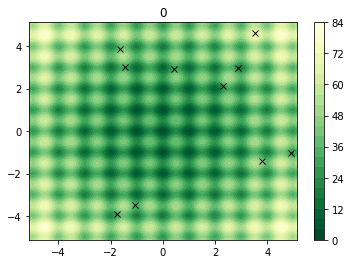

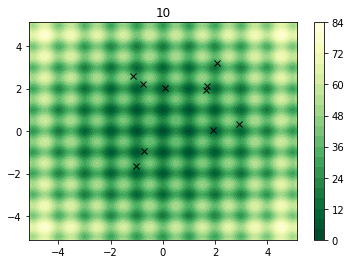

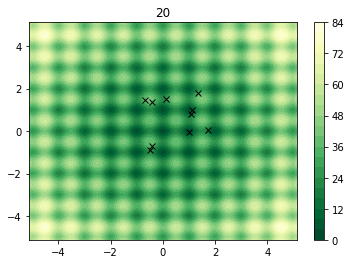

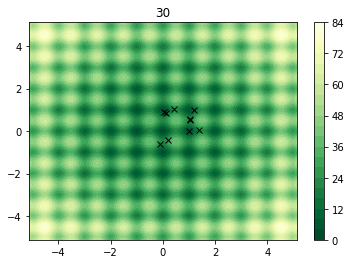

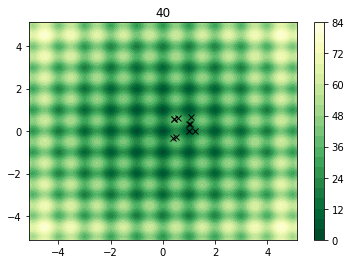

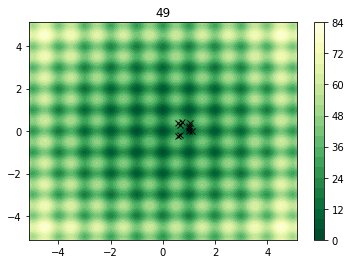

In [3]:
def particle_swarm_optimization(n, gens, w, cog_coeff, social_coeff, plot = True):
    positions = []
    personal_bests = []
    velocities = np.zeros((10, 2))

    # Initialize random swarm search
    for i in range(10):
        x = np.random.uniform(min_, max_)
        y = np.random.uniform(min_, max_)
        positions.append([x,y])
        personal_bests.append([x,y])

    # Computes the best found across the swarm 
    def get_global_best(positions):
        best = np.inf
        best_pair = (None, None)
        for x,y in positions:
            val = rastringen(x,y)
            if val < best:
                best_pair = (x,y)
                best = val
        return best_pair

    def get_personal_best(idx):
        px, py = personal_bests[idx]
        return px, py

    def calc_velocity(x,y,v_prev, idx):
        gx,gy = get_global_best(personal_bests)
        px,py = get_personal_best(idx)

        rg_x = np.random.uniform(0,1)
        rg_y = np.random.uniform(0,1)
        rp_x = np.random.uniform(0,1)
        rp_y = np.random.uniform(0,1)

        v_x = (w * v_prev[0]) + (social_coeff * rg_x * (gx - x)) + (cog_coeff * rp_x * (px - x))
        v_y = (w * v_prev[1]) + (social_coeff * rg_y * (gy - y)) + (cog_coeff * rp_y * (py - y))
        return v_x, v_y

    for i in range(gens):
        new_positions = []
        for idx, particle in enumerate(positions):
            x,y = particle
            v_x, v_y = calc_velocity(x,y,velocities[idx], idx)
            velocities[idx] = v_x, v_y

            x_new = min(max(x + v_x, min_), max_)
            y_new = min(max(y + v_y, min_), max_)
            new_positions.append([x_new, y_new])

            # If new points are better, record personal bests.
            if rastringen(x_new, y_new) < rastringen(x, y):
                personal_bests[idx] = [x_new, y_new]
        positions = new_positions

        if (i % 10 == 0 or i == 49) and plot:
            plt.figure()
            xlist = np.linspace(min_, max_, 100)
            ylist = np.linspace(min_, max_, 100)
            X,Y = np.meshgrid(xlist, ylist)
            Z = rastringen(X, Y)

            for x,y in positions:
                plt.plot(x,y, 'xk')

            plt.title(i)
            plt.contourf(X,Y,Z,20, cmap="YlGn_r")
            plt.colorbar()
    return min([(x, y, rastringen(x, y)) for x,y in personal_bests], key=lambda x: x[2])

print("found optimum: (X, Y, rastringen_value): ", particle_swarm_optimization(n, gens, w, cog_coeff, social_coeff))


## Question 2 Part b

In [4]:
parameter_vector = [w, cog_coeff, social_coeff]
def compute_average(parameter_vector):
    a, b, c = parameter_vector
    sum_ = 0
    for i in range(3):
        x, y, val = particle_swarm_optimization(n, gens, a, b, c, plot=False)
        sum_ += val
    sum_ /= 3
    return sum_
    
max_generations = 50
NP = 30
F = 0.5
CR = 0.1

wmin = 0
wmax = 1

phimin = 0
phimax = 2

# Initialize, random uniformly over search space
vecs = np.zeros((NP, 3))
for i in range(NP):
    vecs[i] = [np.random.uniform(wmin, wmax), np.random.uniform(phimin, phimax), np.random.uniform(phimin, phimax)]

# Implement DE rand/1/bin

# Loop over all the vectors and mutate to next generation. 
for vec_idx in range(NP):
    r1, r2, r3 = np.random.choice(range(NP), 3)
    new_vec = vecs[r1] + (F * (vecs[r2] - vecs[r3]))
    curr_vec = vecs[vec_idx]
    keep_idx = np.random.choice([0, 1, 2])
    
    output = []
    for idx, (i,j) in enumerate(zip(new_vec, curr_vec)):
        randb = np.random.uniform(0, 1)
        if randb < CR or idx == keep_idx:
            output.append(i)
        else:
            output.append(j)
    # Keep only if better
    if compute_average(vecs[vec_idx]) > compute_average(output):
        vecs[vec_idx] = output


    

In [5]:
best = []
_min = np.inf
best_params = [None, None, None]
for vec in range(NP):
    val = compute_average(vecs[vec]) 
    if val < _min:
        best_params = vecs[vec]
        _min = val
print("the best params that were found were with optimal value printed after: [w, phip, phig] value")
print(best_params, _min)

the best params that were found were with optimal value printed after: [w, phip, phig] value
[0.60382532 1.77497457 0.85895152] 1.4632777952291084e-08


(-7.568792065041687e-06, -5.765734718236371e-06, 1.7960498865932095e-08)

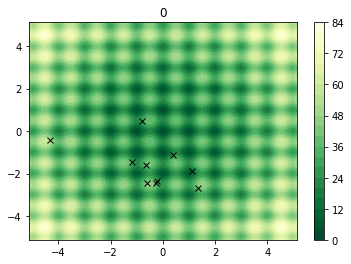

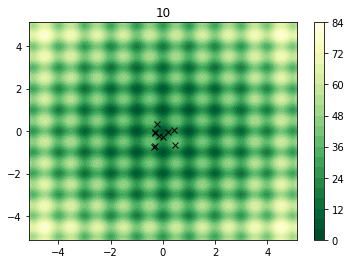

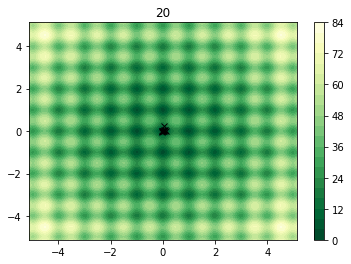

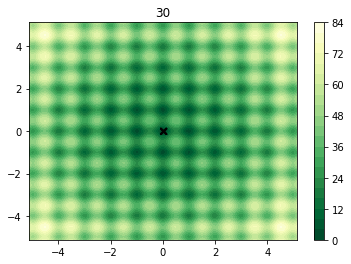

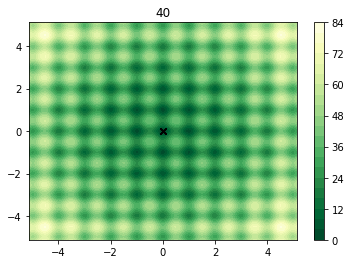

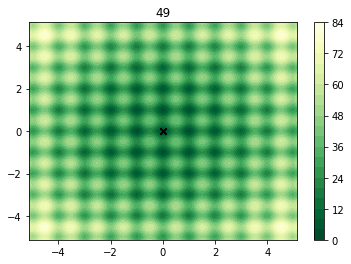

In [6]:
particle_swarm_optimization(n, gens, *best_params)